# Correlation Test

A correlation test is a statistical analysis used to measure and quantify the strength and direction of the relationship between two continuous variables in a dataset. It helps determine whether there is a statistical association or dependence between these variables. There are different types of correlation tests, but two of the most common are the Pearson correlation coefficient and the Spearman rank correlation coefficient.






In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('bodyfat.csv')
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [3]:
data.shape

(252, 15)

In [4]:
data.isnull().sum().sum()

0


### 2) **Spearman's Rank Correlation**

* **Purpose:** It measures the monotonic relationship between two continuous variables. It doesn't assume a linear relationship and is more robust to outliers.

* **Use Cases:** It's employed when the relationship between variables is not necessarily linear or when the data might have outliers. For instance, you might use it to assess the correlation between exam scores and student rankings when the relationship is not expected to be strictly linear.



**2. Monotonic Relationship:**

- A monotonic relationship between two variables means that there is a consistent trend or pattern in the relationship, but it doesn't necessarily have to be a straight line like in a linear relationship.

- In a monotonic relationship, as one variable increases (or decreases), the other variable consistently either increases or decreases (it doesn't have to do so at a constant rate).

- Unlike linear relationships, monotonic relationships can be curved or irregular.

- Monotonic relationships are often assessed using non-parametric correlation methods, such as the Spearman rank correlation coefficient.




In [5]:
# Assumption - Identical and Normal Distribution

In [6]:
sample_1 = data['Hip']
sample_2 = data['BodyFat']

In [7]:
from scipy.stats import spearmanr
stat , p = spearmanr(sample_1, sample_2)
print("stat = {:.2f}, p = {:.8f}".format(stat, p))

if p < 0.05:
    print("Rejecting Null Hypothesis : They are Dependent variables")
else:
    print("Fail to Reject Null Hypothesis: They are Not Dependent variables")

stat = 0.61, p = 0.00000000
Rejecting Null Hypothesis : They are Dependent variables


In [46]:
corr_data = data[['Hip','BodyFat']]

In [64]:
spearman_corr = corr_data.corr(method = 'spearman')

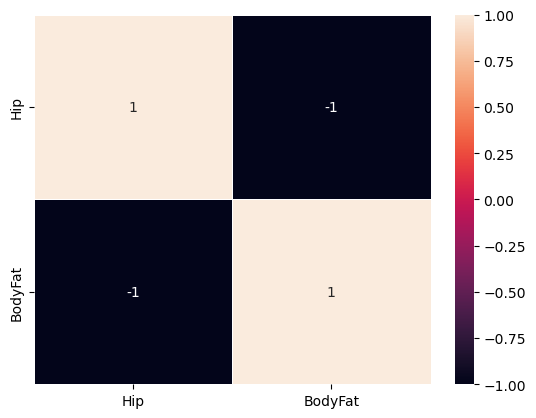

In [65]:
sns.heatmap(spearman_corr.corr(), annot=True, linewidth=.5)
plt.show()

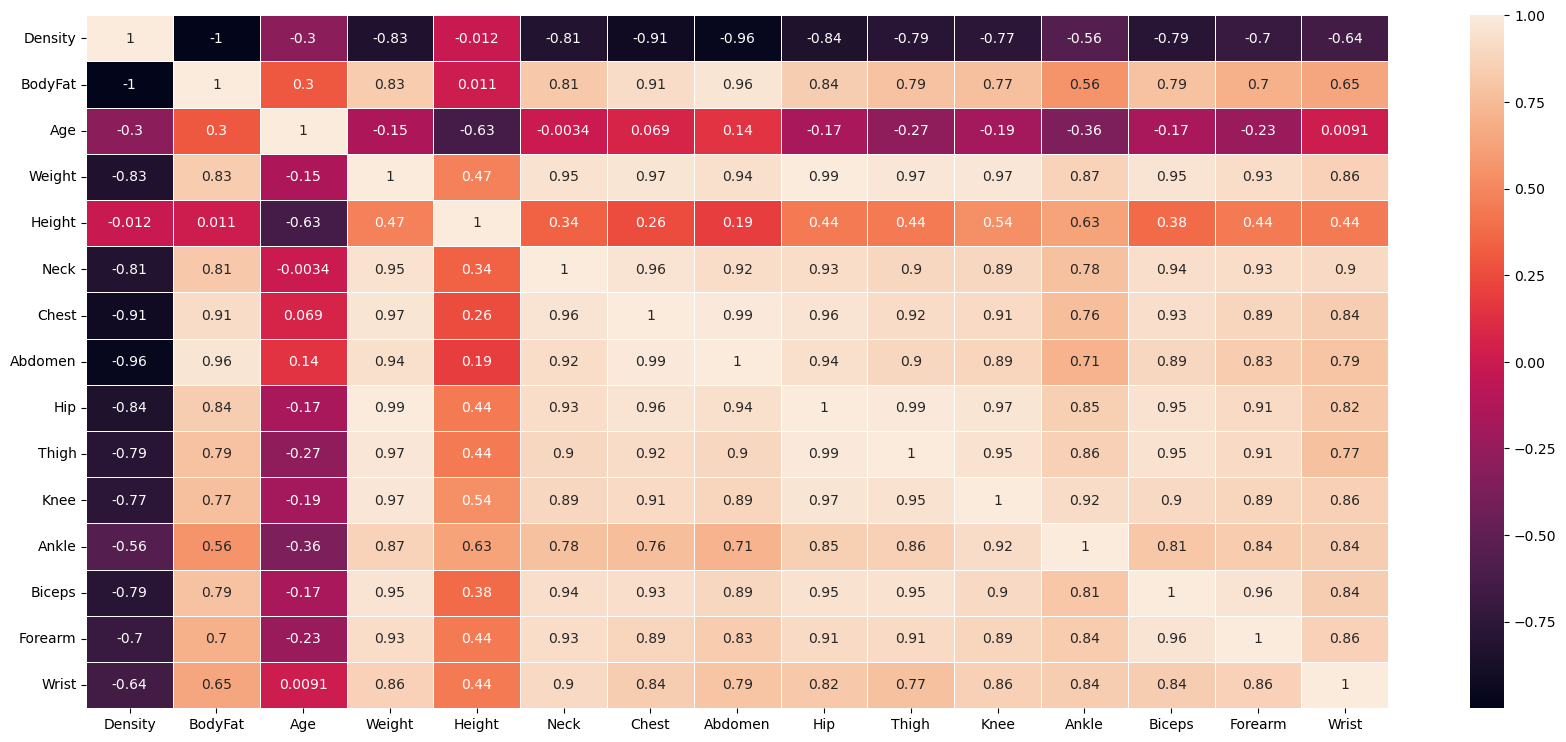

In [66]:
s_data = data.corr(method='spearman')
plt.figure(figsize = (21,9))
sns.heatmap(s_data.corr(), annot = True, linewidth = .5)
plt.show()

In [67]:
chest = data['Chest']
Wrist = data['Wrist']

In [69]:
stat, p = spearmanr(chest, Wrist)
print("stat = {:.2f}, p = {:.4f}".format(stat,p))
if p < 0.05:
    print("Dependent Variable")
else:
    print("Not Dependent Variable")

stat = 0.65, p = 0.0000
Dependent Variable


### 1) **Pearson Test**
* **Purpose:** It measures the linear relationship between two continuous variables, assuming that the data follows a normal distribution.
* **Use Cases:**  It's used when you want to understand the strength and direction of a linear relationship between two variables. For example, you might use it to assess the correlation between age and income, or between temperature and ice cream sales.

**1. Linear Relationship:**

- A linear relationship between two variables means that the change in one variable is directly proportional to the change in the other variable. In other words, as one variable increases (or decreases), the other also increases (or decreases) at a constant rate.

- A common way to quantify a linear relationship is by using the Pearson correlation coefficient (also known as Pearson's r). It ranges from -1 to 1, where:
  - r = 1 indicates a perfect positive linear relationship (both variables increase together).
  - r = -1 indicates a perfect negative linear relationship (one variable increases while the other decreases).
  - r = 0 indicates no linear relationship (there is no consistent pattern of change between the variables).

- Linear relationships are often depicted as straight lines on scatterplots.

In [43]:
from scipy.stats import pearsonr

In [8]:
sample_1 = data['Hip']
sample_2 = data['BodyFat']

In [58]:
stat, p = pearsonr(sample_1, sample_2)
print("stat = {:.2f}, p= {:.4f}".format(stat,p))
if p < 0.05:
    print("Reject Null Hypothesis : They are Dependent Variables")
else:
    print("Fail to reject Null Hypothesis : They are Not Dependent Variable")

stat = 0.63, p= 0.0000
Reject Null Hypothesis : They are Dependent Variables


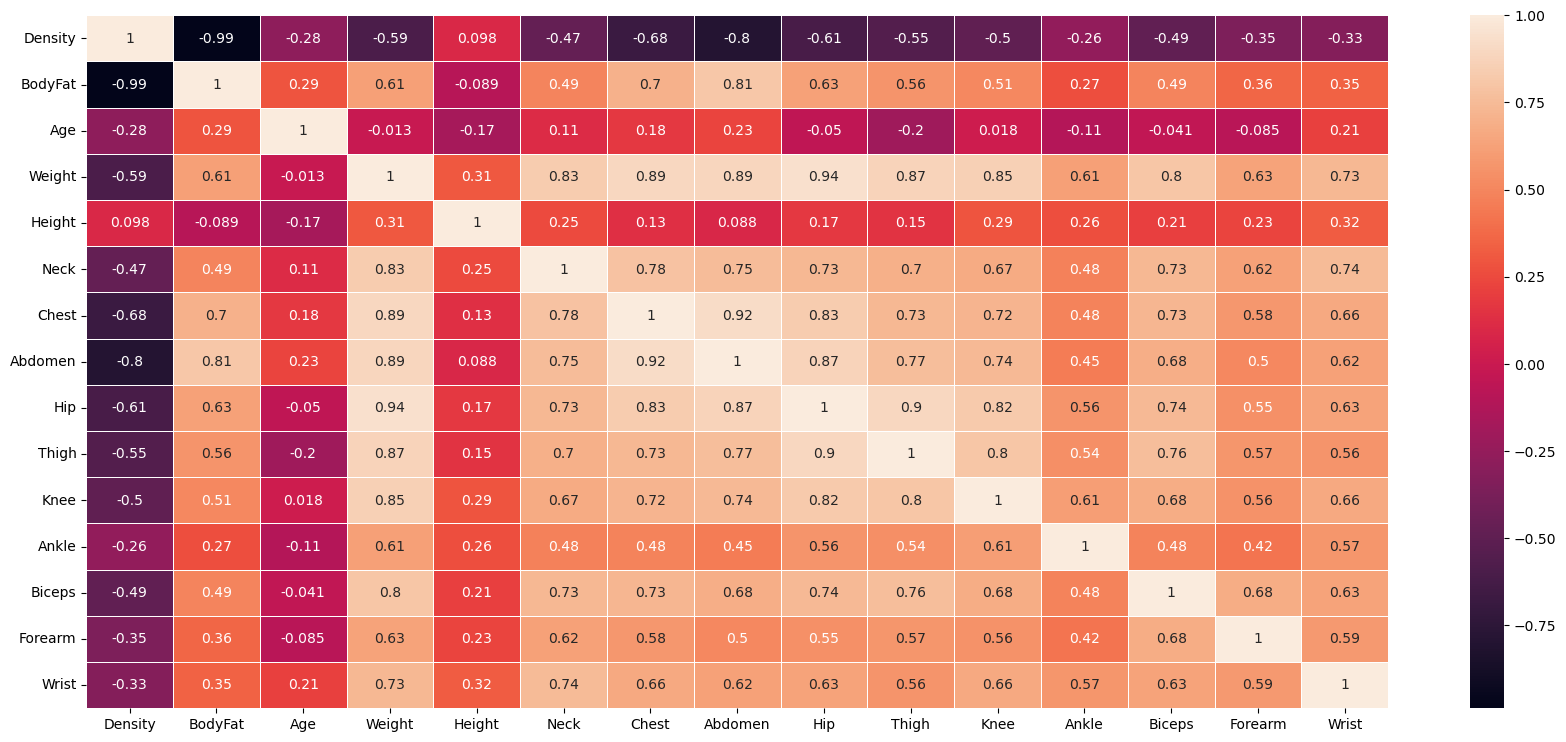

In [60]:
plt.figure(figsize= (21,9))
sns.heatmap(data.corr(), annot=True, linewidth=.5)
plt.show()

In [70]:
c_data = data.corr(method = 'pearson')

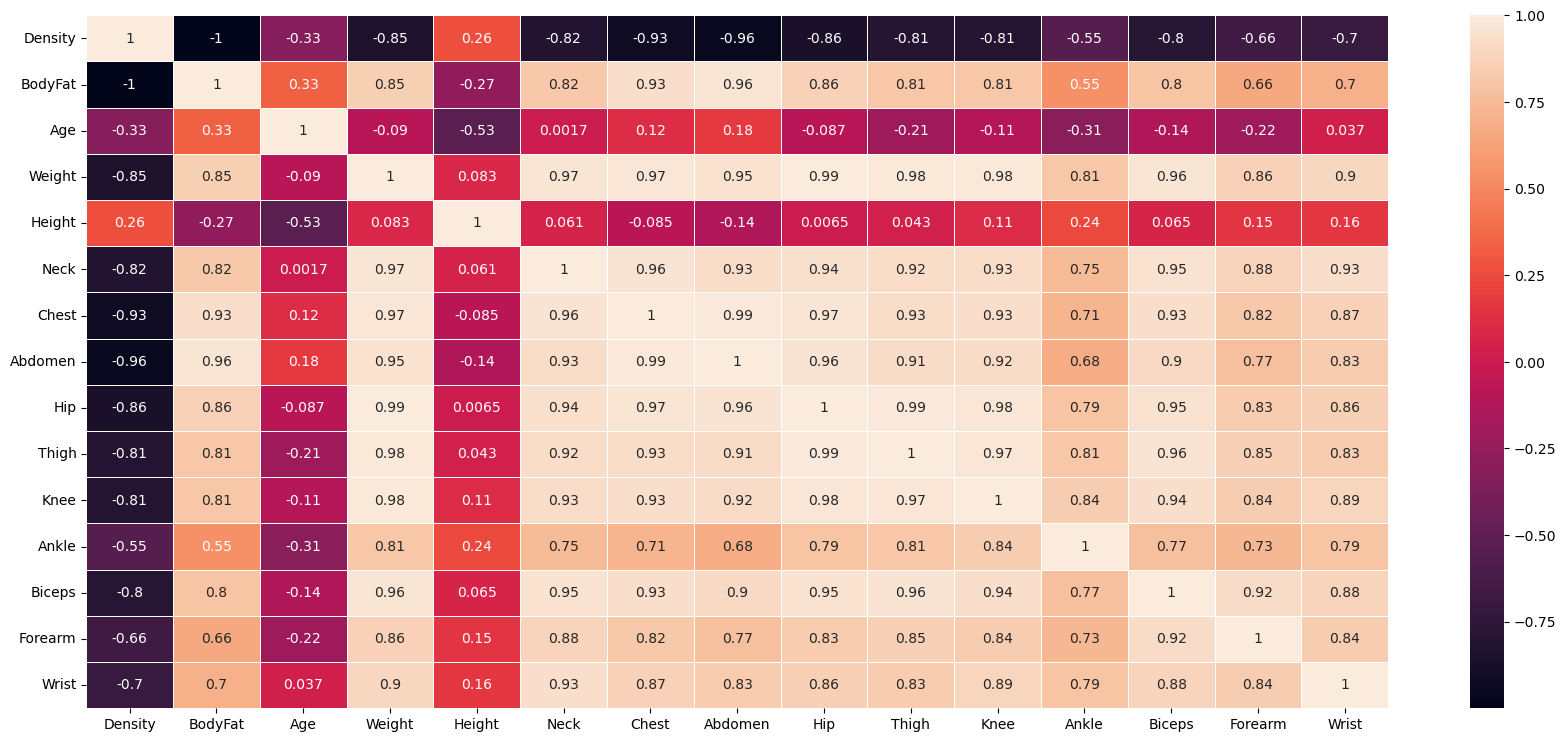

In [71]:
plt.figure(figsize= (21,9))
sns.heatmap(c_data.corr(), annot=True, linewidth=.5)
plt.show()